In [9]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import fitsio
import glob

import numpy as np
import healpy as hp
import astropy.io.fits as pyfits
import xlens
import astropy.table as astTable
from matplotlib.ticker import MaxNLocator

[2.59802074e-04 1.18944262e-04 8.11657822e-05 1.35866991e-04
 1.96796479e-04]
[2.11705822e-04 1.18341155e-04 7.87396299e-05 1.29895542e-04
 1.86474304e-04]
[1.28248877e-04 9.05552308e-05 1.16328444e-04 1.91580904e-04
 6.60542023e-04]
[1.31664348e-04 8.31071771e-05 1.17730315e-04 1.83734878e-04
 6.17740156e-04]
[6.38780499e-04 2.74764817e-04 9.49650628e-05 9.43366069e-05
 1.67281744e-04]
[6.48896580e-04 2.63926541e-04 8.99188522e-05 8.59517172e-05
 1.55468841e-04]
[4.55875944e-04 2.09218245e-04 7.96626195e-05 1.34163795e-04
 4.29185347e-04]
[4.11794558e-04 1.96559311e-04 7.76508350e-05 1.27092140e-04
 3.90907319e-04]


/tmp/ipykernel_28944/3343141722.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


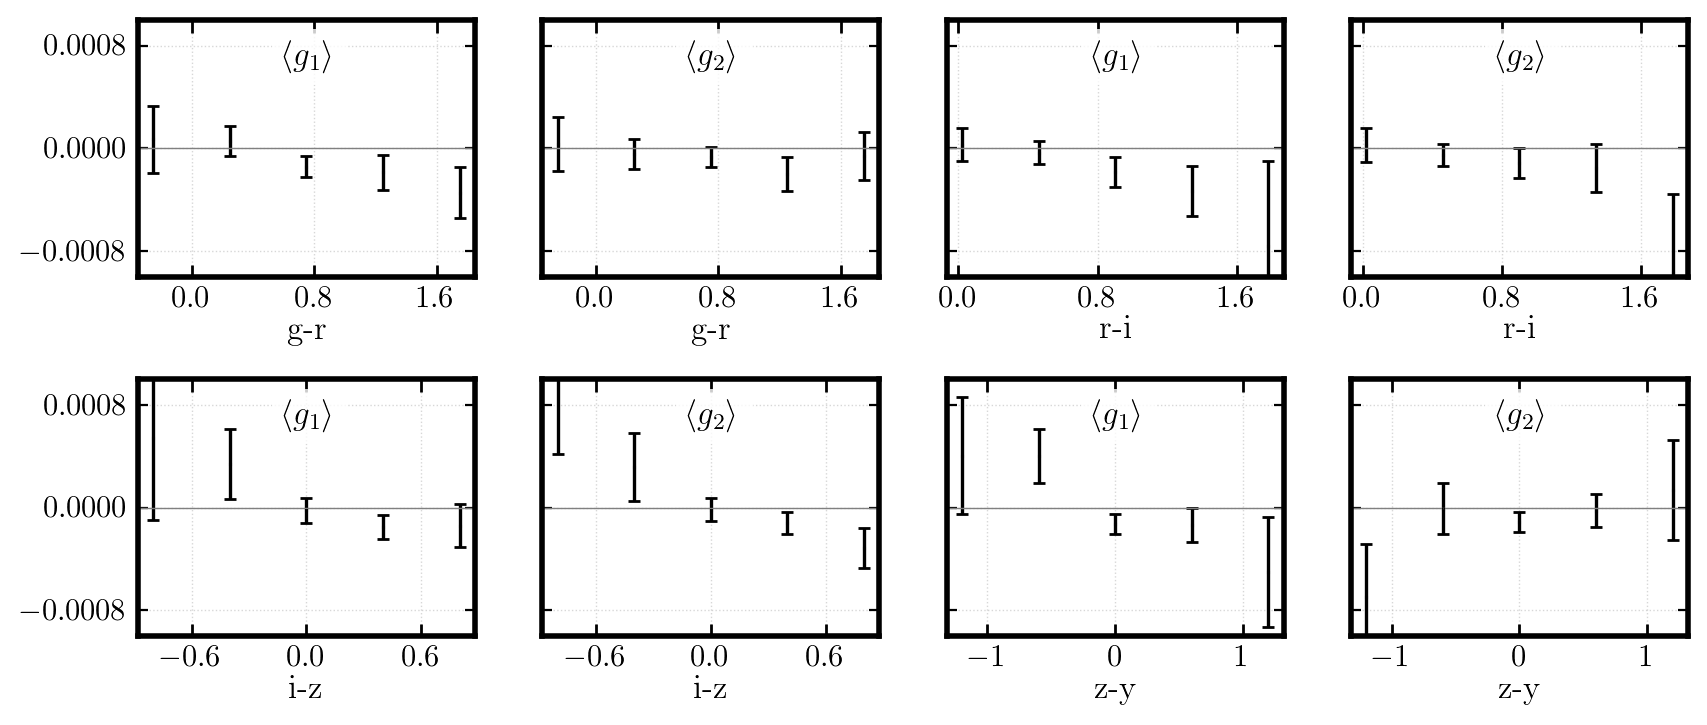

In [11]:
# Create x, y, yerr for all 8 plots
x_data = []
y_data = []
y_errs = []

def compute_xy(data_subset):
    arr = np.average(data_subset, axis=0)
    x  = arr[0]
    y1 = arr[1] / arr[2]
    y2 = arr[3] / arr[4]
    return x, y1, y2

for ff in ["gr", "ri", "iz", "zy"]:
    data = fitsio.read(f"/gpfs02/work/xiangchong.li/work/hsc_data/s23b/deepCoadd_anacal2/{ff}_stack.fits")
    # get the “nominal” values
    x, y1, y2 = compute_xy(data)
    
    # ---- bootstrap parameters ----
    nboot = 1000                      # number of bootstrap samples
    nreal = data.shape[0]             # how many realizations you have
    
    # pre-allocate arrays to hold each trial
    y1_boot = np.empty((nboot, y1.size))
    y2_boot = np.empty((nboot, y2.size))
    
    # ---- run the bootstrap ----
    for i in range(nboot):
        # sample `nreal` indices with replacement
        idx = np.random.choice(nreal, size=nreal, replace=True)
        # compute ratios on that resampled set
        _, y1_i, y2_i = compute_xy(data[idx])
        y1_boot[i] = y1_i
        y2_boot[i] = y2_i
    
    # ---- compute the 1-σ errors ----
    y1_err = np.std(y1_boot, axis=0)
    y2_err = np.std(y2_boot, axis=0)

    x_data.extend([x, x])
    y_data.extend([y1, y2])
    y_errs.extend([y1_err, y2_err])
    
# Titles and labels
titles = [r'$\langle g_1 \rangle$', r'$\langle g_2 \rangle$'] * 4
xlabels = ["g-r", "g-r", "r-i","r-i", "i-z","i-z", "z-y", "z-y"]

# Plotting
fig, axes = plt.subplots(2, 4, figsize=(10, 4), sharey=True, gridspec_kw={'hspace': 0.4})
axes = axes.flatten()

for i, ax in enumerate(axes):
    x = x_data[i]
    y = y_data[i]
    yerr = y_errs[i]

    ax.errorbar(x, y, yerr=yerr, fmt='s', color='black', markersize=0.1, capsize=2, linewidth=1.2)
    print(yerr)
    ax.axhline(0, color='gray', linewidth=0.5)
    ax.grid(True, linestyle=':', linewidth=0.5)
    ax.xaxis.set_major_locator(MaxNLocator(nbins=3))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
    ax.text(0.43, 0.92, titles[i], transform=ax.transAxes,
            fontsize=12, va='top', ha='left',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))
    ax.set_xlabel(xlabels[i], fontsize=12, labelpad=1)
    ax.set_ylim(-0.001, 0.001)
    ax.tick_params(labelsize=11)

plt.tight_layout()
plt.show()

/tmp/ipykernel_28944/1578377574.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


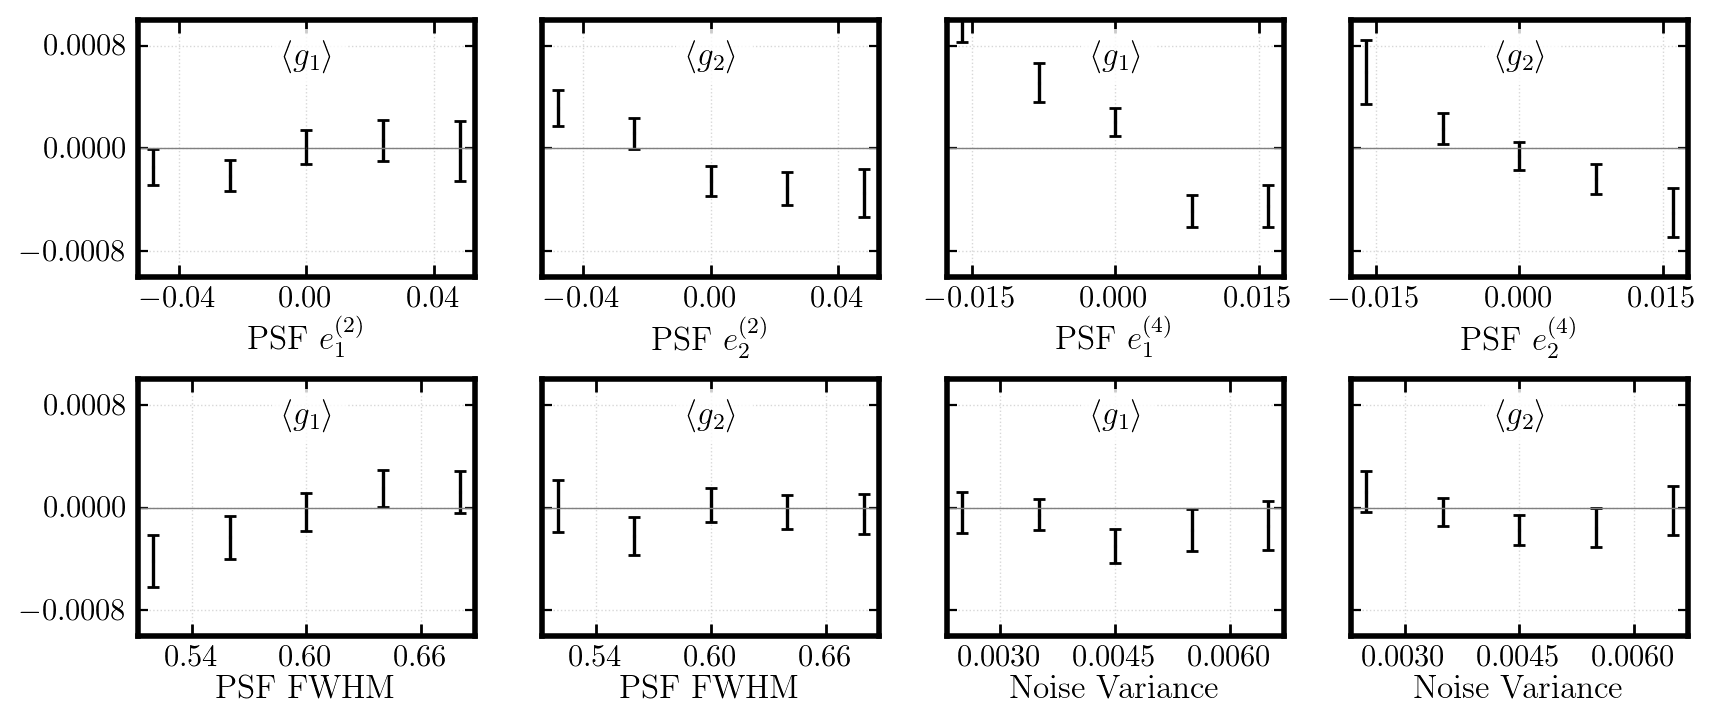

In [12]:
# Create x, y, yerr for all 8 plots
x_data = []
y_data = []
y_errs = []

def compute_xy(data_subset):
    arr = np.average(data_subset, axis=0)
    x  = arr[0]
    y1 = arr[1] / arr[2]
    y2 = arr[3] / arr[4]
    return x, y1, y2

for ff in ["psf2", "psf4", "size", "var"]:
    data = fitsio.read(f"/gpfs02/work/xiangchong.li/work/hsc_data/s23b/deepCoadd_anacal2/{ff}_stack.fits")
    # get the “nominal” values
    x, y1, y2 = compute_xy(data)
    
    # ---- bootstrap parameters ----
    nboot = 1000                      # number of bootstrap samples
    nreal = data.shape[0]             # how many realizations you have
    
    # pre-allocate arrays to hold each trial
    y1_boot = np.empty((nboot, y1.size))
    y2_boot = np.empty((nboot, y2.size))
    
    # ---- run the bootstrap ----
    for i in range(nboot):
        # sample `nreal` indices with replacement
        idx = np.random.choice(nreal, size=nreal, replace=True)
        # compute ratios on that resampled set
        _, y1_i, y2_i = compute_xy(data[idx])
        y1_boot[i] = y1_i
        y2_boot[i] = y2_i
    
    # ---- compute the 1-σ errors ----
    y1_err = np.std(y1_boot, axis=0)
    y2_err = np.std(y2_boot, axis=0)

    x_data.extend([x, x])
    y_data.extend([y1, y2])
    y_errs.extend([y1_err, y2_err])
    
# Titles and labels
titles = [r'$\langle g_1 \rangle$', r'$\langle g_2 \rangle$'] * 4
xlabels = [
    r'PSF $e_1^{(2)}$', r'PSF $e_2^{(2)}$',
    r'PSF $e_1^{(4)}$', r'PSF $e_2^{(4)}$',
    'PSF FWHM', 'PSF FWHM',
    'Noise Variance', 'Noise Variance'
]

# Plotting
fig, axes = plt.subplots(2, 4, figsize=(10, 4), sharey=True, gridspec_kw={'hspace': 0.4})
axes = axes.flatten()

for i, ax in enumerate(axes):
    x = x_data[i]
    y = y_data[i]
    yerr = y_errs[i]

    ax.errorbar(x, y, yerr=yerr, fmt='s', color='black', markersize=0.1, capsize=2, linewidth=1.2)
    ax.axhline(0, color='gray', linewidth=0.5)
    ax.grid(True, linestyle=':', linewidth=0.5)
    ax.xaxis.set_major_locator(MaxNLocator(nbins=3))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
    ax.text(0.43, 0.92, titles[i], transform=ax.transAxes,
            fontsize=12, va='top', ha='left',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))
    ax.set_xlabel(xlabels[i], fontsize=12, labelpad=1)
    ax.set_ylim(-0.001, 0.001)
    ax.tick_params(labelsize=11)

plt.tight_layout()
plt.show()

In [65]:
msk = (mag_r - mag_i <  1.8) & (mag_i - mag_z > -0.8) & (mag_z - mag_y > -1.3)
msk = (mag_g < 26.5) & (mag_r< 26.5) & (mag_i< 25.0) & (mag_z< 26.) & (mag_y< 26.)